# LIME

### Model Agnostic i.e can work on any existing ML Model

### Works "locally" , Applies Linear Model locally

### Presented in the paper Why Should I trust You?

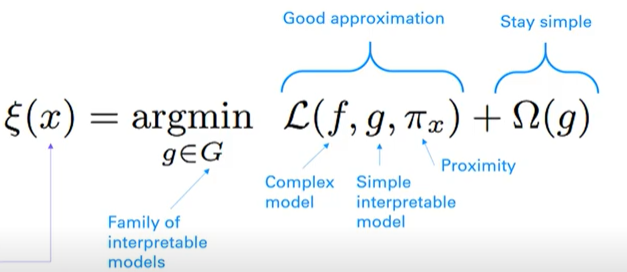

### Epsilon is the model with the least error
### L(f,g,pi) is the loss function for the given local model. Note: f is the global model
### Sigma is the corresponding regularization (l1/l2) of the local model

## Training
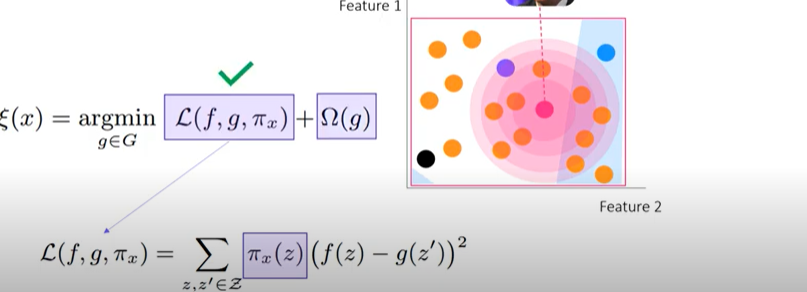

 #### Here we use the loss function of Linear regression by comparing the values predicted for the pertubed points(orange) using the global function and compare it to the Linear model present locally

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="../LR and Decision Trees/data.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols], 
                                prefix=categorical_cols)

        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        self.data.bmi = self.data.bmi.fillna(0)
        
        self.data.drop(["id"], axis=1, inplace=True)

        
    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2021)
    
    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

In [11]:
data_loader=DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

In [12]:
X_train,X_test,y_train,y_test=data_loader.get_data_split()

In [13]:
X_train,y_train=data_loader.oversample(X_train,y_train)

In [14]:
X_train.shape

(7778, 21)

In [15]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

NameError: name 'y_pred' is not defined

In [16]:
y_pred=rf.predict(X_test)
print("F1 Score : {}".format(f1_score(y_test,y_pred,average='macro')))

F1 Score : 0.5471372488047577


In [18]:
print("Accuracy : {}".format(accuracy_score(y_test,y_pred)))

Accuracy : 0.9442270058708415


In [21]:
lime=LimeTabular(predict_fn=rf.predict_proba,data=X_train,random_state=42)

C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
lime_local=lime.explain_local(X_test[-10:],y_test[-10:],name='LIME')
show(lime_local)

C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mrudhulraj Natarajan\.conda\envs\NLP\lib\si

<!-- http://127.0.0.1:7001/1781508303432/ -->